In [30]:
import minisom
import pandas as pd
import sklearn
import matplotlib

In [31]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

In [32]:
data = pd.read_csv('data/wines.csv')
data

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [33]:
X = data.iloc[:, 1:14].values
y = data.iloc[:, 0].values

In [34]:
scale = MinMaxScaler(feature_range=(0, 1))
X = scale.fit_transform(X)

In [35]:
som = MiniSom(x=8, y=8, input_len=13, sigma=1.0, learning_rate=0.5, random_seed=12)

In [36]:
som.random_weights_init(X)

In [37]:
som.train_random(data=X, num_iteration=1000)

In [38]:
som._weights.shape

(8, 8, 13)

In [39]:
q = som.activation_response(X)

In [40]:
q

array([[3., 2., 1., 0., 0., 6., 7., 4.],
       [1., 1., 4., 0., 0., 2., 6., 4.],
       [7., 4., 1., 5., 2., 4., 3., 7.],
       [6., 0., 4., 2., 2., 2., 2., 3.],
       [4., 1., 1., 1., 2., 2., 3., 3.],
       [3., 4., 1., 3., 3., 1., 3., 2.],
       [6., 4., 0., 3., 0., 3., 3., 2.],
       [3., 7., 0., 5., 1., 1., 3., 5.]])

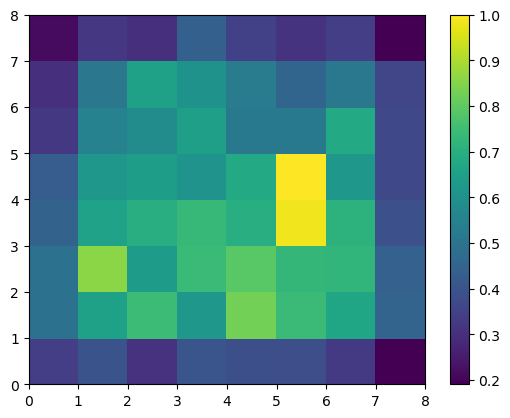

In [41]:
pcolor(som.distance_map().T)
colorbar(); # MID - mean inter neuron distance

In [42]:
w = som.winner(X[2])
w

(0, 6)

In [43]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']

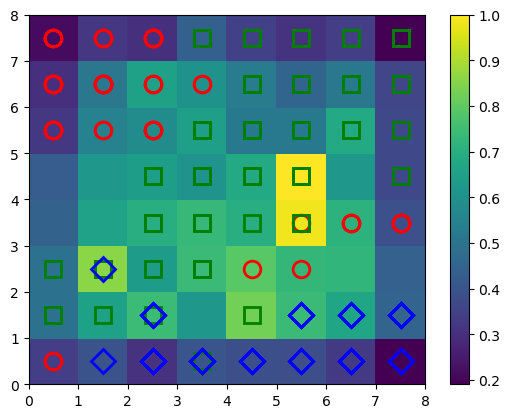

In [44]:
pcolor(som.distance_map().T)
colorbar()

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i] - 1], markerfacecolor='None', markeredgecolor=color[y[i] - 1], markersize=12, markeredgewidth=2)